# Book Recommendation System

Over the past few decades, the ascent of platforms such as Youtube, Amazon, and Netflix, alongside a plethora of other web-based services, has ushered in an era where recommender systems play an increasingly integral role in our daily lives. From suggesting products to potential buyers in the realm of e-commerce to customizing online advertisements to align with user preferences, these systems have become ubiquitous in our digital journeys. Regardless of the industry, recommender systems leverage algorithms to curate personalized recommendations, spanning from movies and articles to products, tailored to individual users' interests and specific market demands.

Their significance is paramount, not only for their potential to drive substantial revenue but also for their capacity to provide a competitive advantage in the market landscape. As a result, the development of effective recommendation systems has become a focal point for businesses seeking to enhance user experience and maximize engagement. In this context, the objective lies in crafting a recommendation system tailored specifically for book enthusiasts, reflecting the growing importance and versatility of such algorithms in meeting diverse consumer needs.

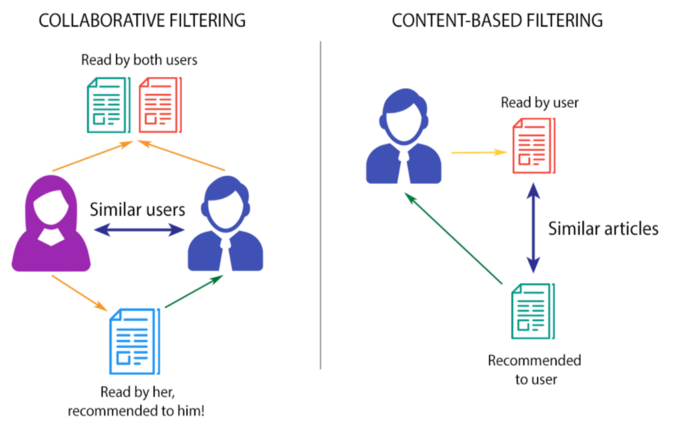

# Content
## The Book-Crossing dataset comprises three files

**Users:**

The "Users" file within the Book-Crossing dataset acts as a comprehensive repository for user-related information. It features anonymized user IDs, converted into integers for data processing purposes. Additionally, the file includes demographic data, such as location and age, whenever available. In instances where demographic details are absent, these fields are marked as NULL values. This file serves as a foundational resource for understanding the user base participating in the Book-Crossing platform, facilitating analyses related to user behavior, preferences, and engagement patterns.

**Books:**

Dedicated solely to cataloging the extensive array of books within the dataset, the "Books" file is a crucial component of the Book-Crossing dataset. Each book is identified by its International Standard Book Number (ISBN), with any invalid ISBNs having already been filtered out. This file not only provides fundamental identification but also offers additional content-based information sourced from Amazon Web Services. This information includes essential details such as book titles, primary authors (with only the first author listed in cases of multiple authors), publication years, and publishing houses. Furthermore, URLs linking to cover images are included in three different sizes, providing users with visual representations of the books available in the dataset.

**Ratings:**

The "Ratings" file serves as a comprehensive record of the feedback loop within the Book-Crossing platform. It captures users' sentiments towards specific books, classifying ratings as either explicit or implicit. Explicit ratings are expressed on a scale from 1 to 10, where higher values signify greater appreciation, while implicit ratings are indicated by a rating of 0. This file offers invaluable insights into the reception and popularity of various books among users. It serves as a cornerstone for recommendation systems and further analyses aimed at enhancing user experience and engagement within the Book-Crossing platform.

**Importing Libraries**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')

In [ ]:
sns.set()

**Book Data**

In [ ]:
# Book dataset overview
book_data = pd.read_csv("Books.csv")
book_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [ ]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
book_data.shape

(271360, 8)

**Users Data**

In [ ]:
users_data= pd.read_csv('Users.csv')
users_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
users_data.shape

(278858, 3)

**Ratings Data**

In [ ]:
ratings_data = pd.read_csv("Ratings.csv")
ratings_data.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
ratings_data.shape

(1149780, 3)

# Data Preparation (Data Cleaning and Feature Engineering)

### Let's take first book_data dataset

In [ ]:
# droping the url
book_data.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis= 1, inplace= True)

In [ ]:
# replacing '-' with '_' and features name in lower case
book_data.columns= book_data.columns.str.strip().str.lower().str.replace('-', '_')
users_data.columns= users_data.columns.str.strip().str.lower().str.replace('-', '_')
ratings_data.columns= ratings_data.columns.str.strip().str.lower().str.replace('-', '_')

In [ ]:
#sets the maximum width for displaying columns as 10000
pd.set_option('display.max_colwidth', 10000)

In [ ]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271360 non-null  object
 1   book_title           271360 non-null  object
 2   book_author          271358 non-null  object
 3   year_of_publication  271360 non-null  object
 4   publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


### Let's see null values in book_data.

In [ ]:
print(book_data.isnull().sum())

isbn                   0
book_title             0
book_author            2
year_of_publication    0
publisher              2
dtype: int64


In [ ]:
# nan values in particular column
book_data.loc[(book_data['book_author'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing


In [ ]:
# Null values in particular column
book_data.loc[(book_data['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


We pointed null values in 'book_author' and 'publisher' feature.

Let's look at the unique years to realize the time period as this dataset was created in 2004.

In [ ]:
# getting unique value from 'year_of_publication' feature
book_data['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

Let's check at the corresponding rows in the dataframe.

In [ ]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title'
book_data[book_data['year_of_publication'] == 'DK Publishing Inc']

,isbn,book_title,book_author,year_of_publication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [ ]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title'
book_data[book_data['year_of_publication'] == 'Gallimard']

,isbn,book_title,book_author,year_of_publication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


### There has to make some correction in three rows as you can see in above output. Let's fix it.

In [ ]:
book_data.loc[221678]

isbn                                                                                                                    0789466953
book_title             DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"
book_author                                                                                                                   2000
year_of_publication                                                                                              DK Publishing Inc
publisher                                                             http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg
Name: 221678, dtype: object

In [ ]:
book_data.loc[209538]

isbn                                                                                                             078946697X
book_title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"
book_author                                                                                                            2000
year_of_publication                                                                                       DK Publishing Inc
publisher                                                      http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
Name: 209538, dtype: object

In [ ]:
book_data.loc[220731]

isbn                                                                                 2070426769
book_title             Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"
book_author                                                                                2003
year_of_publication                                                                   Gallimard
publisher                          http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg
Name: 220731, dtype: object

Let's fix it and make it in correct format as per our dataset.

In [ ]:
# function to fix mismatch data in feature 'book_title', 'book_author', ' year_of_publication', 'publisher'
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [ ]:
replace_df_value(book_data, 209538, 'book_title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(book_data, 209538, 'book_author', 'Michael Teitelbaum')
replace_df_value(book_data, 209538, 'year_of_publication', 2000)
replace_df_value(book_data, 209538, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data, 221678, 'book_title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(book_data, 221678, 'book_author', 'James Buckley')
replace_df_value(book_data, 221678, 'year_of_publication', 2000)
replace_df_value(book_data, 221678, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data, 220731,'book_title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(book_data, 220731, 'book_author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(book_data, 220731, 'year_of_publication', 2003)
replace_df_value(book_data, 220731, 'publisher', 'Gallimard')

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [ ]:
book_data.loc[209538]

isbn                                                                                       078946697X
book_title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)
book_author                                                                        Michael Teitelbaum
year_of_publication                                                                              2000
publisher                                                                           DK Publishing Inc
Name: 209538, dtype: object

In [ ]:
book_data.loc[221678]

isbn                                                                                                   0789466953
book_title             DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)
book_author                                                                                         James Buckley
year_of_publication                                                                                          2000
publisher                                                                                       DK Publishing Inc
Name: 221678, dtype: object

In [ ]:
book_data.loc[220731]

isbn                                              2070426769
book_title             Peuple du ciel, suivi de 'Les Bergers
book_author                  Jean-Marie Gustave Le ClÃ?Â©zio
year_of_publication                                     2003
publisher                                          Gallimard
Name: 220731, dtype: object

### Now it is been fixed. We can view perfect matching for their corresponding features.

We've seen there are two missing values in the 'publisher' column. Let's take care of that. As we have seen

In [ ]:
book_data.loc[(book_data['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [ ]:
# replacing 'Nan' with 'No Mention'
book_data.loc[(book_data['isbn'] == '193169656X'),'publisher'] = 'No Mention'
book_data.loc[(book_data['isbn'] == '1931696993'),'publisher'] = 'No Mention'

In [ ]:
df = pd.DataFrame(book_data)
cols = [4]
df = df[df.columns[cols]]

In [ ]:
pd.set_option('display.max_columns', None)
df.head(5)

,publisher
0,Oxford University Press
1,HarperFlamingo Canada
2,HarperPerennial
3,Farrar Straus Giroux
4,W. W. Norton &amp; Company


In [ ]:
book_data[book_data['publisher'] == 'No Mention']

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,No Mention
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,No Mention


So we've change the publisher's name from 'NaN' to 'No Mention'.

## Let's see now user_data dataset

In [ ]:
# users_data size
print(users_data.shape)

(278858, 3)


In [ ]:
# unique value in age
users_data['age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

There is NaN value in age. We can replace NaN with mean of 'age'.

In [ ]:
# replacing nan with average of 'age'
users_data['age'].fillna((users_data['age'].mean()), inplace=True)

In [ ]:
users_data['age'].unique()

array([ 34.7514337,  18.       ,  17.       ,  61.       ,  26.       ,
        14.       ,  25.       ,  19.       ,  46.       ,  55.       ,
        32.       ,  24.       ,  20.       ,  34.       ,  23.       ,
        51.       ,  31.       ,  21.       ,  44.       ,  30.       ,
        57.       ,  43.       ,  37.       ,  41.       ,  54.       ,
        42.       ,  50.       ,  39.       ,  53.       ,  47.       ,
        36.       ,  28.       ,  35.       ,  13.       ,  58.       ,
        49.       ,  38.       ,  45.       ,  62.       ,  63.       ,
        27.       ,  33.       ,  29.       ,  66.       ,  40.       ,
        15.       ,  60.       ,   0.       ,  79.       ,  22.       ,
        16.       ,  65.       ,  59.       ,  48.       ,  72.       ,
        56.       ,  67.       ,   1.       ,  80.       ,  52.       ,
        69.       ,  71.       ,  73.       ,  78.       ,   9.       ,
        64.       , 103.       , 104.       ,  12.       ,  74. 

In [ ]:
# retrieving age data between 5 to 90
users_data.loc[(users_data['age'] > 90) | (users_data['age'] < 5)] = np.nan

In [ ]:
users_data['age'].fillna((users_data['age'].mean()), inplace=True)

In [ ]:
users_data['age'].unique()

array([34.7514337 , 18.        , 17.        , 61.        , 26.        ,
       14.        , 25.        , 19.        , 46.        , 55.        ,
       32.        , 24.        , 20.        , 34.        , 23.        ,
       51.        , 31.        , 21.        , 44.        , 30.        ,
       57.        , 43.        , 37.        , 41.        , 54.        ,
       42.        , 50.        , 39.        , 53.        , 47.        ,
       36.        , 28.        , 35.        , 13.        , 58.        ,
       49.        , 38.        , 45.        , 62.        , 63.        ,
       27.        , 33.        , 29.        , 66.        , 40.        ,
       15.        , 60.        , 34.73485224, 79.        , 22.        ,
       16.        , 65.        , 59.        , 48.        , 72.        ,
       56.        , 67.        , 80.        , 52.        , 69.        ,
       71.        , 73.        , 78.        ,  9.        , 64.        ,
       12.        , 74.        , 75.        , 76.        , 83.  

As we can see above we don't have any null values for age.

## Now let's take ratings_data dataset

In [ ]:
ratings_data.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
# finding unique ISBNs from rating and book dataset
unique_ratings = ratings_data[ratings_data.isbn.isin(book_data.isbn)]
unique_ratings

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [ ]:
print(ratings_data.shape)
print(unique_ratings.shape)

(1149780, 3)
(1031136, 3)


In [ ]:
# unique ratings from 'book_rating' feature
unique_ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2])

# Data Visualizations

## Book_data dataset

**Analysis no. 1** -

Which are the top Author with number of books ?

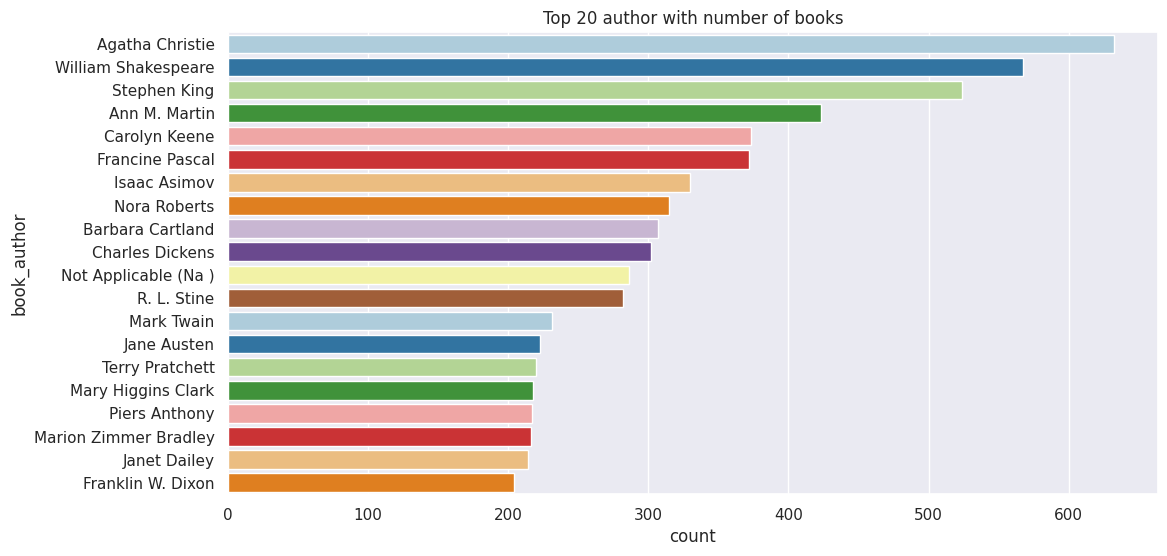

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_author",palette = 'Paired', data=book_data,order=book_data['book_author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")
plt.show()

Agatha Christie is leading at top with more than 600 counts, followed by William Shakespeare. We can plot some hypothesis point :-

* It can happen in some possible cases that Agatha Christie is not a best Author, though Agatha Christie has most number of books as compared to others.
* William Shakespeare is one of the popular Author in the world. Still he doesn't have highest number of books.
* Among all other Authors, it might happen that few of the Author might have some of the best seller books who have millions of copies been sold in world.  

**Analysis no.2** -

 Which are top publishers with published books ?

In [ ]:
book_data['publisher'].value_counts().sort_values(ascending = False).head(20)

publisher
Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Penguin USA                 2717
Harpercollins               2525
Fawcett Books               2258
Signet Book                 2070
Random House Inc            2045
St Martins Pr               1953
St. Martin's Press          1783
Tor Books                   1704
HarperCollins Publishers    1700
Zebra Books                 1694
Name: count, dtype: int64

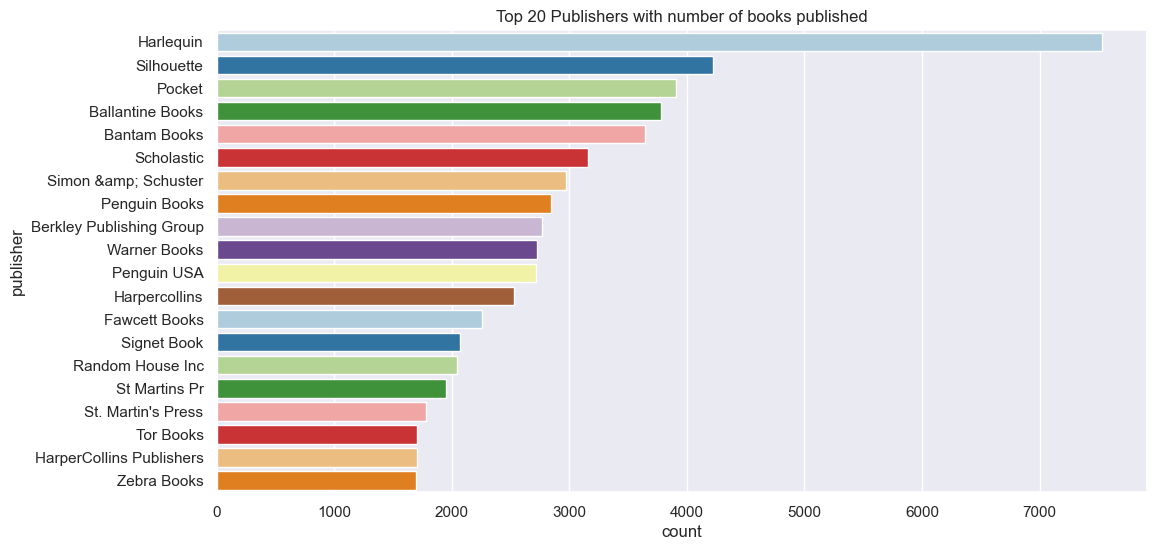

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y="publisher",palette = 'Paired', data=book_data,order=book_data['publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books published")
plt.show()

Harlequin has most number of books published, followed by Silhouette. Hypothesis analysis to focus :-

* Some of the top Author's had published their books from Harlequin.
* We can observe Harlequin publiser's marking better performance than any other publishers.
* Penguin Books, Warner Books, Penguin USA, Berkely Publishing Group and many more are among popular publisher's remarking competition with Harlequin.
* Though Penguin Books Publisher has less number of books published but it might happen that only top Author's are approaching towards Penguin Books Publisher.

**Analysis no.3** -

Number of Books published in yearly.

In [ ]:
book_data1 = book_data

In [ ]:
df = book_data1['year_of_publication'].value_counts().sort_values(ascending = False).reset_index(name = 'No of books published')
df['year_of_publication']=df['year_of_publication'].astype(int)
df
df1 = df[df['year_of_publication']!=0]

In [ ]:
df2 = df1.sort_values(by = 'year_of_publication')
df2.head()

,year_of_publication,No of books published
198,1376,1
191,1378,1
177,1806,1
194,1897,1
171,1900,1


In [ ]:
df2['year_of_publication']=df2['year_of_publication'].astype(object)

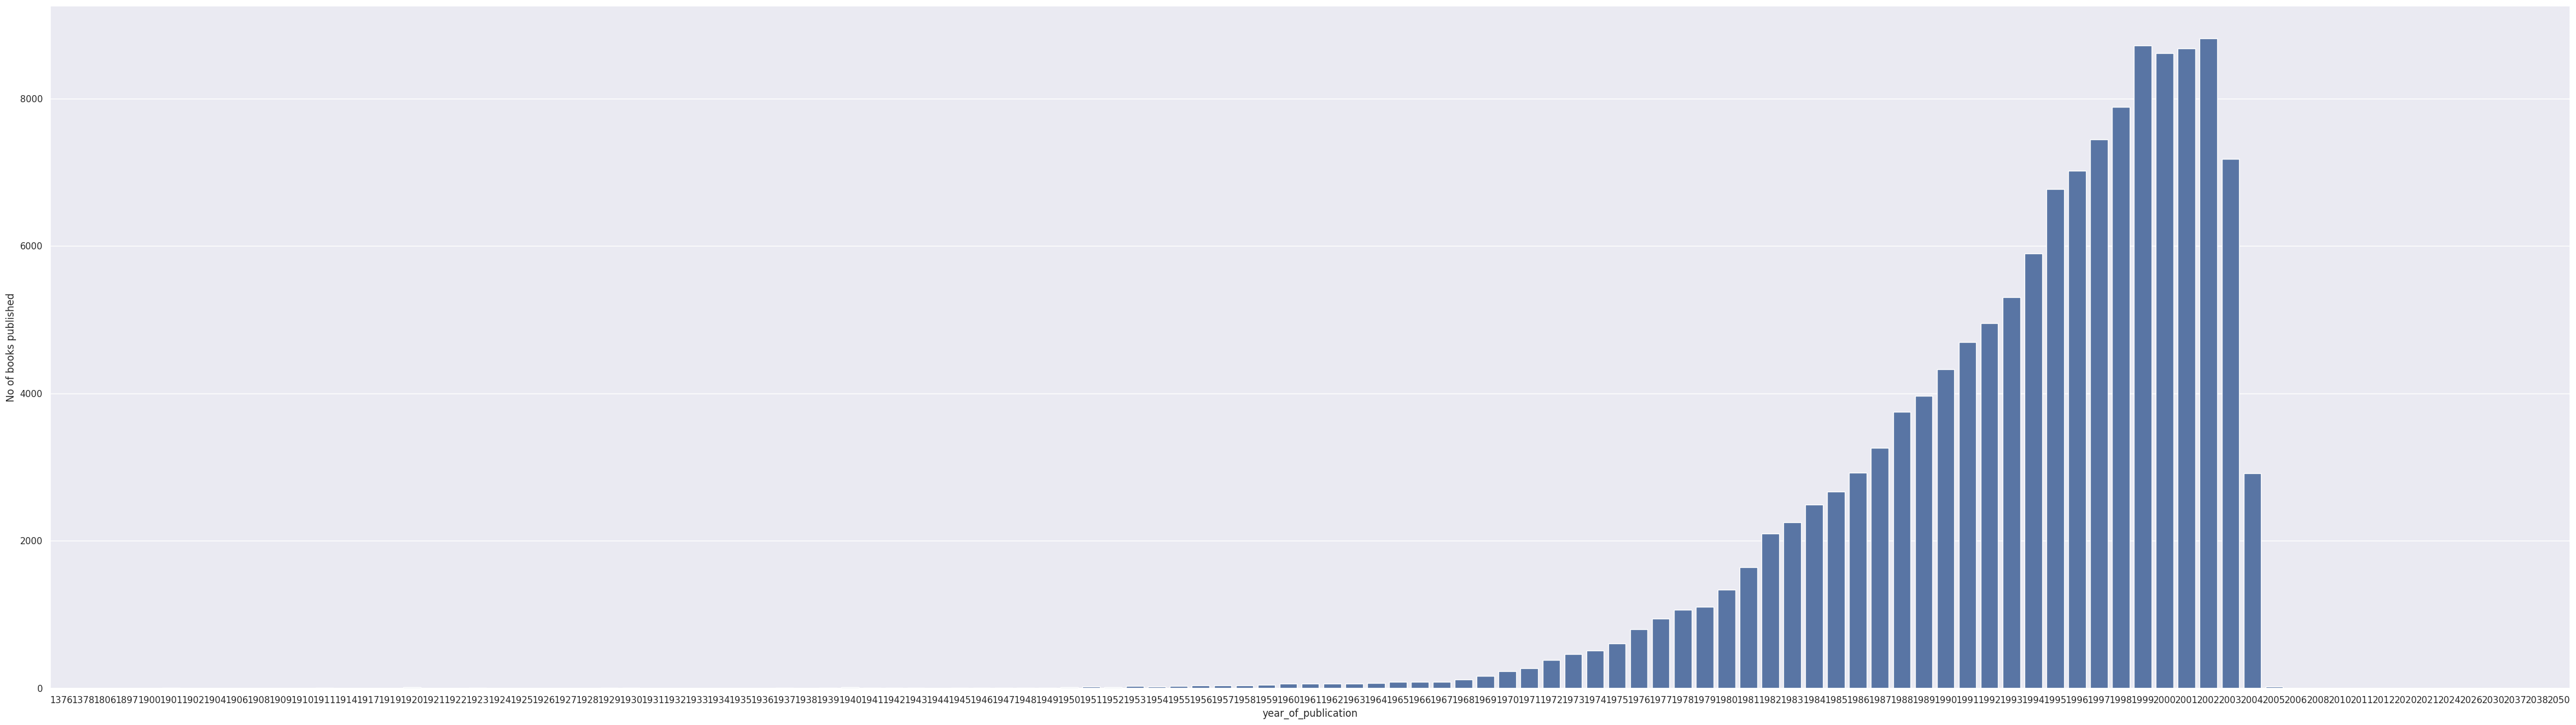

In [ ]:
fig = plt.figure(figsize =(55, 15))
sns.barplot(x = 'year_of_publication', y = 'No of books published', data =df2, ci = None)
plt.show()

In [ ]:
book_data.year_of_publication = pd.to_numeric(book_data.year_of_publication, errors='coerce')

# Checking for 0's or NaNs in Year of Publication
zero_year = book_data[book_data.year_of_publication == 0].year_of_publication.count()
nan_year = book_data.year_of_publication.isnull().sum()

print(f'There are {zero_year} entries as \'0\', and {nan_year} NaN entries in the Year of Publication field')

# Replace all years of zero with NaN
book_data.year_of_publication.replace(0, np.nan, inplace=True)

There are 4618 entries as '0', and 0 NaN entries in the Year of Publication field


year.where(year > 5): This line filters the counts obtained in the previous step. It retains only those counts (or occurrences) where the count is greater than 5. For the counts that are 5 or fewer, it replaces them with NaN (Not a Number), effectively removing them from the result.

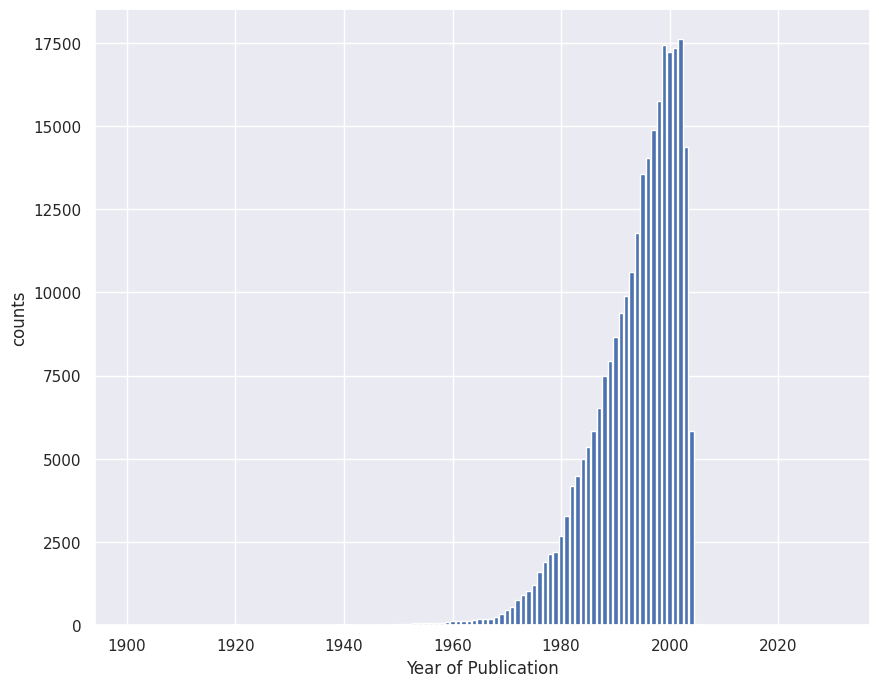

In [ ]:
year = book_data.year_of_publication.value_counts().sort_index()
year = year.where(year>5)
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15})
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

So we can see publication years are somewhat between 1950 - 2005 here.The publication of books got vital when it starts emerging from 1950. We can get some hyothesis key points:-

* It might happen people starts to understand the importance of books and gradually got productivity habits in their life.
* Every user has their own taste to read books based on what particular subject Author uses. The subject of writing books got emerge from late 1940 slowly. Till 1970 it has got the opportunity to recommend books to people or users what they love to read.
* The highest peak we can observe is between 1995-2001 year. The user understand what they like to read. Looking towards the raise the recommendation is also increase to understand their interest.

## User_data Dataset

**Analysis no.4** -

Age distributions of users_data

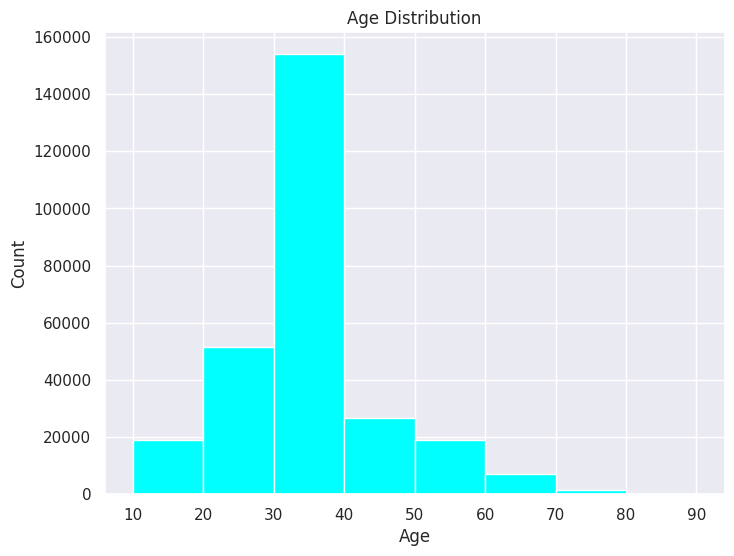

In [ ]:
plt.figure(figsize=(8,6))
users_data.age.hist(bins=[10*i for i in range(1, 10)], color = 'cyan')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Looking towards the users age between 30-40 prefer more and somewhat we can also view between 20-30. Let's make some hypothesis analysis:-

* It is obvious that most of the user books are from Age 30 to 40.
* It might happen that the users are more interested on that subject what Authors are publishing in the market.
* The age group between 20-30 are immensely attracted to read books published by Author.
* We can observe same pitch for Age group between 10-20 and 50-60. There are can be lot of different reasons.

## Ratings_data Dataset

**Analysis No. 5**

What are top 20 books as per number of ratings ?

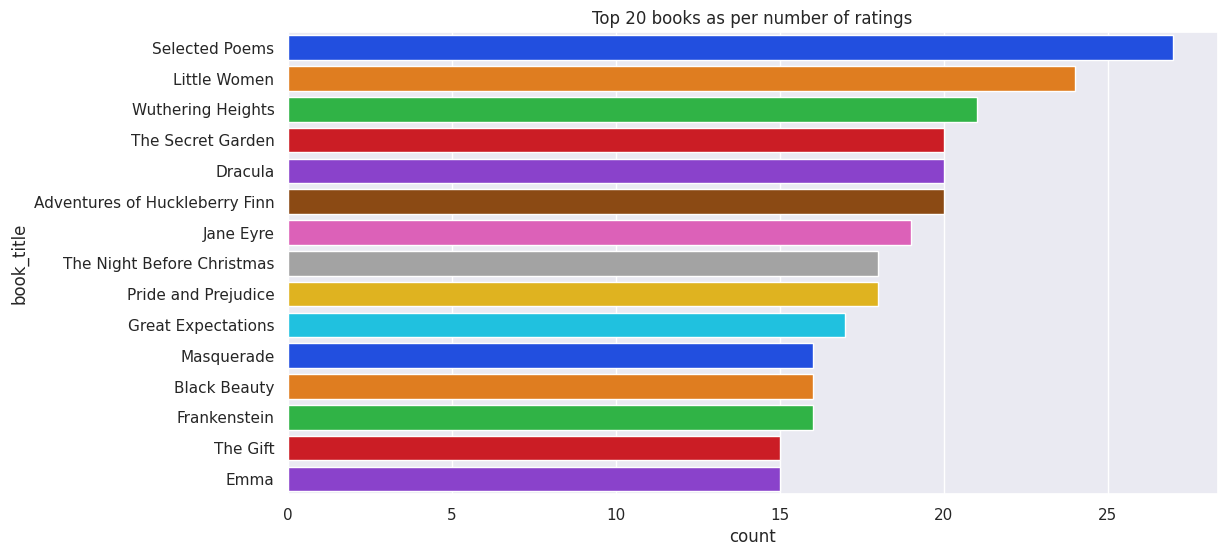

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_title",palette = 'bright',data= book_data, order=book_data['book_title'].value_counts().index[0:15])
plt.title("Top 20 books as per number of ratings")
plt.show()

As per ratings "Selected Poems" has been rated most followed by "Little Women".
* Selected Poems are most favourable to users as per ratings.
* Three of the books 'The Secret Garden', 'Dracula','Adventures of Huckleberry Finn'are struggling to compete with each other. Similarly, we can observe in 'Masquerade','Black Beauty','Frankenstein'.


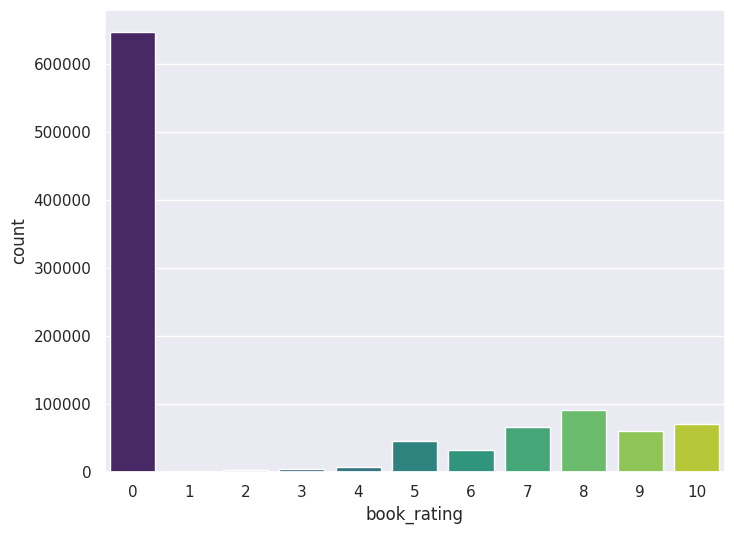

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="book_rating",palette = 'viridis',data= unique_ratings)
plt.show()

Firstly the above ratings are unique ratings from 'ratings_data' and 'books_data' dataset.
 We have to separate the explicit ratings represented by 1–10 and implicit ratings represented by 0. Let's make some hypothesis assumptions :-

* This countplot shows users have rated 0 the most, which means they haven't rated books at all.
* Still we can see pattern to recognize in ratings from 1-10.
* Mostly the users have rated 8 ratings out of 10 as per books. It might happen that the feedback is positive but not extremely positive as 10 ratings (i.e best books ever).

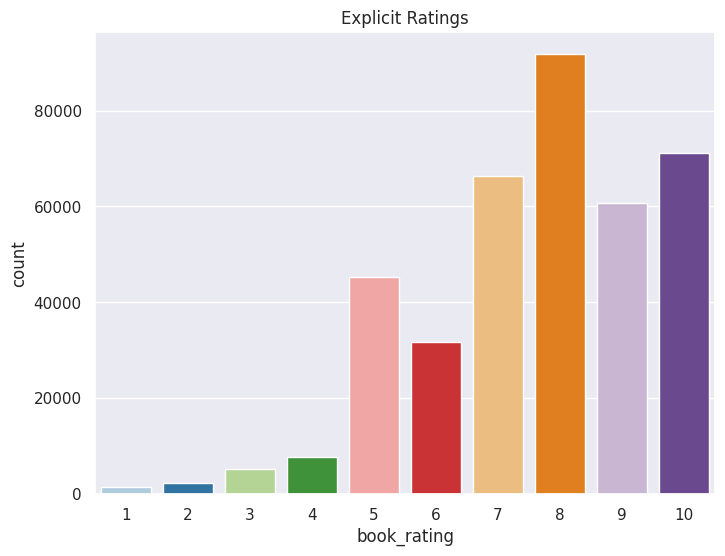

In [ ]:
# Explicit Ratings
plt.figure(figsize=(8,6))
rate_data = unique_ratings[unique_ratings['book_rating'] != 0]
sns.countplot(x="book_rating",palette = 'Paired',data=rate_data)
plt.title("Explicit Ratings")
plt.show()

Now this countplot of bookRating indicates that higher ratings are more common amongst users and rating 8 has been rated highest number of times. There can be many assumptions based on ratings of users :-

* Let's take ratings group from 1-4. This can be negative impact for books been published if they have ratings from 1 to 4. It can be issues related to -
      1. Language
      2. Offend by any chapter's incident/paragraph/Author
      3. They've read worst book ever.

* If we think analytical about rating 5, it might happen some same reason as above key points mention.
* For 5 ratings the users might not sure about book ratings whether it's positive or negative impact.
* Let's take ratings group from 6-10. This are positive feedback -
      1. It can happen that not every book is perfect in all desire. So, the user's have decided to rate 8.   
      2. Since 6 ratings is very low among other ratings.
      3. As we can aspect 7 and 8 are average and more ratings from users.
      4. 9 and 10 ratings are top best ratings based on Author's, Publisher's and Books been published.        

# Recommendation System

Now let's try to build recommendation system based on popularity (i.e ratings). This recommendations are usually given to every user irrespective of personal characterization.

 We have to separate the explicit ratings represented by 1–10 and implicit ratings represented by 0.

In [ ]:
ratings_explicit= unique_ratings[unique_ratings['book_rating'] != 0]   # explicit ratings represented by 1–10
ratings_implicit= unique_ratings[unique_ratings['book_rating'] == 0]   # implicit ratings represented by 0

In [ ]:
ratings_explicit.head()

,user_id,isbn,book_rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [ ]:
print(unique_ratings.shape)
print(ratings_explicit.shape)

(1031136, 3)
(383842, 3)


Merging book_data dataset and ratings_explicit. Considering ISBNs that were explicitely rated for this recommendation system.

In [ ]:
# Merging book_data dataset and ratings_explicit
new_book_df= pd.merge(book_data, ratings_explicit, on='isbn')
new_book_df.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,123629,9


In [ ]:
print(new_book_df.shape)

(383842, 7)


In [ ]:
new_book_df['book_title'].count()

383842

In [ ]:
new_book_df['book_title'].nunique()

135567

So we've 135567 number of unique values in book_title columns.

## Let's take top 10 recommendation books

In [144]:
# top ten books as per book ratings and recommendation
top_ten_books= pd.DataFrame(new_book_df.groupby('book_title')['book_rating'].count()
                         .sort_values(ascending=False).head(10))
print('The top ten books as per ratings : ')
top_ten_books

The top ten books as per ratings : 


,book_rating
book_title,
The Lovely Bones: A Novel,707
Wild Animus,581
The Da Vinci Code,494
The Secret Life of Bees,406
The Nanny Diaries: A Novel,393
The Red Tent (Bestselling Backlist),383
Bridget Jones's Diary,377
A Painted House,366
Life of Pi,336


The above are the top 10 books recommendation as per ratings. But this are not based on some recommendation system. They are top 10 books which are being rated by the people most

# Memory-Based Collaborative Filtering

This approach uses the memory of previous users interactions to compute users similarities based on items they've interacted (user-based approach) or compute items similarities based on the users that have interacted with them (item-based approach).


## Train - Test Split

In [ ]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(new_book_df, test_size=0.20)

In [ ]:
print(f'Training set lengths: {len(train_data)}')
print(f'Testing set lengths: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

Training set lengths: 307073
Testing set lengths: 76769
Test set is 20% of the full dataset.


In [ ]:
# Get int mapping for user_id in train dataset
u_unique_train = train_data.user_id.unique()
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}

# Get int mapping for isbn in train dataset
i_unique_train = train_data.isbn.unique()
train_data_book2idx = {o:i for i, o in enumerate(i_unique_train)}

In [ ]:
# Get int mapping for user_id in test dataset
u_unique_test = test_data.user_id.unique()
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}

# Get int mapping for isbn in test dataset
i_unique_test = test_data.isbn.unique()
test_data_book2idx = {o:i for i, o in enumerate(i_unique_test)}

In [ ]:
# training set
train_data['u_unique'] = train_data['user_id'].map(train_data_user2idx)
train_data['i_unique'] = train_data['isbn'].map(train_data_book2idx)

# testing set
test_data['u_unique'] = test_data['user_id'].map(test_data_user2idx)
test_data['i_unique'] = test_data['isbn'].map(test_data_book2idx)

# Convert back to three feature of dataframe
train_data = train_data[['u_unique', 'i_unique', 'book_rating']]
test_data = test_data[['u_unique', 'i_unique', 'book_rating']]

In [ ]:
train_data.sample(5)

,u_unique,i_unique,book_rating
333430,338,48238,9
54674,3186,4445,8
307701,3161,91913,10
136216,3906,16957,7
126712,880,41071,7


In [ ]:
test_data.sample(5)

,u_unique,i_unique,book_rating
179419,11206,7158,8
95239,9871,14602,5
158405,352,10055,10
78935,1141,9435,9
307631,10807,16284,7


## User-Item for Train Data

In [ ]:
# first I'll create an empty matrix of users books and then I'll add the appropriate values to the matrix by extracting them from the dataset
n_users = train_data['u_unique'].nunique()
n_books = train_data['i_unique'].nunique()

train_matrix = np.zeros((n_users, n_books))

for entry in train_data.itertuples():
    train_matrix[entry[1]-1, entry[2]-1] = entry[3]    # entry[1] is the user-id, entry[2] is the book-isbn and -1 is to counter 0-based indexing

In [ ]:
train_matrix.shape

(59725, 128966)

## User-Item for Test Data

In [ ]:
n_users = test_data['u_unique'].nunique()
n_books = test_data['i_unique'].nunique()

test_matrix = np.zeros((n_users, n_books))

for entry in test_data.itertuples():
    test_matrix[entry[1]-1, entry[2]-1] = entry[3]

In [ ]:
test_matrix.shape

(26141, 46932)

## Cosine Similarity Based Recommendation System

A distance metric commonly used in recommender systems is cosine similarity, where the ratings are seen as vectors in n-dimensional space and the similarity is calculated based on the angle between these vectors.


In [ ]:
# To make item-item similarity we need to take the transpose of the matrix
train_matrix_small = train_matrix[:5000, :5000]
test_matrix_small = test_matrix[:5000, :5000]

from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_matrix_small, metric='cosine')
item_similarity = pairwise_distances(train_matrix_small.T, metric='cosine')

In [ ]:
# function to predict the similarity :
def predict_books(ratings, similarity, type='user'): # default type is 'user'
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)

        # Use np.newaxis so that mean_user_rating has the same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [ ]:
item_prediction = predict_books(train_matrix_small, item_similarity, type='item')
user_prediction = predict_books(train_matrix_small, user_similarity, type='user')

## Evaluation Metric

In [ ]:
# Evaluation metric by mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, test_matrix):
    prediction = prediction[test_matrix.nonzero()].flatten()
    test_matrix = test_matrix[test_matrix.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, test_matrix))

print(f'Item-based CF RMSE: {rmse(item_prediction, test_matrix_small)}')
print(f'User-based CF RMSE: {rmse(user_prediction, test_matrix_small)}')

Item-based CF RMSE: 7.932731729735641
User-based CF RMSE: 7.931952704747255


By cosine similarity in recommendation system it gives 7.94 RMSE score.

We can make improvement in this score by using another method. Let's use Single Value Decomposition model (SVD) model to implement.

## Let's go through Model based approach by SVD model.

In [145]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162989 sha256=e1e9c36dc4a53e1759a140cdcf1160174271b7077df3d38efa3d30d186f23ff6
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [146]:
from surprise import Reader, Dataset

In [147]:
# Creating a 'Reader' object to set the limit of the ratings
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings_explicit, reader)

In [148]:
from surprise import SVD, model_selection, accuracy
model = SVD()

# Train on books dataset
%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6343  1.6340  1.6370  1.6386  1.6315  1.6351  0.0025  
Fit time          9.28    10.03   8.22    8.21    9.19    8.99    0.70    
Test time         0.93    0.74    0.81    0.59    0.53    0.72    0.15    
CPU times: user 57.7 s, sys: 568 ms, total: 58.3 s
Wall time: 58.8 s


{'test_rmse': array([1.63431635, 1.63404696, 1.63696058, 1.63860686, 1.63147279]),
 'fit_time': (9.281302213668823,
  10.034895896911621,
  8.217821598052979,
  8.213597059249878,
  9.192896127700806),
 'test_time': (0.9285256862640381,
  0.7380926609039307,
  0.8129658699035645,
  0.5893511772155762,
  0.5290298461914062)}

## Train - Test Split

In [149]:
# train and test split
trainset, testset = model_selection.train_test_split(data, test_size=0.2)

# SVD model
model = SVD()
model.fit(trainset)

## Evaluation metrics for SVD model

In [150]:
# displaying RMSE score
predictions = model.test(testset)
print(f"The accuracy is {accuracy.rmse(predictions)}")

RMSE: 1.6278
The accuracy is 1.627768846275026


The RMSE score is better now with 1.63.

## Testing Results

In [151]:
# to test result let's take an user-id and item-id to test our model.
uid = 276744
iid = '038550120X'
pred = model.predict(uid, iid, verbose=True)

user: 276744     item: 038550120X r_ui = None   est = 7.40   {'was_impossible': False}


Now let's display estimated rating and real rating

In [152]:
# display estimated rating and real rating
print(f'The estimated rating for the book with ISBN code {pred.iid} from user #{pred.uid} is {pred.est:.2f}.\n')
actual_rtg= ratings_explicit[(ratings_explicit.user_id==pred.uid) &
                             (ratings_explicit.isbn==pred.iid)].book_rating.values[0]
print(f'The real rating given for this was {actual_rtg:.2f}.')

The estimated rating for the book with ISBN code 038550120X from user #276744 is 7.40.

The real rating given for this was 7.00.


In [153]:
# The following function was adapted from the surprise docs
# and can be used to get the top book recommendations for each user.
from collections import defaultdict

def get_top_n(predictions, n=10):

    # First map the predictions to each user
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [154]:
# prediciton on teset and getting top predictions
pred = model.test(testset)
top_n = get_top_n(pred)

In [155]:
pred_testset_df = pd.DataFrame(pred)
pred_testset_df

,uid,iid,r_ui,est,details
0,61791,0515136557,10.0,6.836254,{'was_impossible': False}
1,161041,0156996936,10.0,8.464057,{'was_impossible': False}
2,42189,0765300133,5.0,8.182568,{'was_impossible': False}
3,98758,0425053873,4.0,7.844588,{'was_impossible': False}
4,228990,044022165X,8.0,7.718124,{'was_impossible': False}
...,...,...,...,...,...
76764,57398,0345384466,9.0,8.416370,{'was_impossible': False}
76765,219955,0451458559,6.0,7.289762,{'was_impossible': False}
76766,2033,0439064864,9.0,9.009462,{'was_impossible': False}
76767,192845,0440241537,5.0,7.967251,{'was_impossible': False}


We can view predictions from testset that we performed with SVD model.

### Retrieving full book titles from full 'books_users_ratings' dataframe

In [156]:
def get_reading_list(userid):

    reading_list = defaultdict(list)
    top_n = get_top_n(pred, n=10)
    for n in top_n[userid]:
        book, rating = n
        title = new_book_df.loc[new_book_df.isbn==book].book_title.unique()[0]
        reading_list[title] = rating
    return reading_list

In [158]:
#take a random look at user_id
example_reading_list = get_reading_list(userid=116866)
for book, rating in example_reading_list.items():
    print(f'{book}: {rating}')

Prairyerth: (A Deep Map (A Deep Map): 8.005671230960733
Chaos: Making a New Science: 7.926349100731457
Death With Reservations (Pennyfoot Hotel Mystery Series , No 10): 7.871169416121052
In search of excellence: Lessons from America's best-run companies: 7.869904858252508
Excel: 7.822500435384257
Does God Play Dice: The Mathematics of Chaos: 7.822500435384257
The Biosphere.: 7.822500435384257
Landmarks in Western Science: From Prehistory to the Atomic Age: 7.822500435384257
Lucy: The Beginnings of Humankind: 7.822500435384257
Calculus: Early Transcendental Functions: 7.822500435384257


**As we can observe above we've got top recommendation of books and ratings with respective to it. So this was my recommendation system for BOOK RECOMMENDATION SYSTEM.**

# Conclusion


- Agatha Christie leads among the top 20 authors with over 600 books, closely followed by William Shakespeare.
- Harlequin emerges as the top publisher, closely followed by Silhouette.
- The timeline of book publications ranges from 1950 to 2005, reflecting a prolific period of literary output.
- Predominant readership falls within the 30-40 age group, with significant engagement also observed among those aged 20-30.
- "Selected Poems" and "Little Women" are standout titles among rated books, while zero ratings suggest a sizable portion of users haven't engaged in rating.
- The top 10 books list, based on ratings, highlights "The Lovely Bones: A Novel" with 707 ratings, though this ranking isn't generated through a recommendation system.
- Our recommendation system achieved an RMSE score of 7.94 using cosine similarity, significantly improved to 1.63 with the Singular Value Decomposition (SVD) model.
- SVD consistently delivers the lowest RMSE across all data subsets (users, ratings, and books), establishing it as the optimal model for our dataset.
- In conclusion, our model-based approach effectively identifies and ranks the top 10 recommended books, providing valuable insights into reader preferences and ratings.